**Discrete Fourier Transform Examples Notebook**

N. Stergioulas

Aristotle University of Thessaloniki

v1.0 (May 2020)

###### Content provided under a Creative Commons Attribution license, [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/); code under [GNU GPLv3 License](https://choosealicense.com/licenses/gpl-3.0/). (c)2020 [Nikolaos Stergioulas](http://www.astro.auth.gr/~niksterg/)

In [1]:
import numpy as np
from scipy import fftpack 
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 18
mpl.rc('xtick', labelsize=16) ; mpl.rc('ytick', labelsize=16) 
plt.rcParams['figure.figsize']=8,5 ; plt.rcParams['legend.fontsize']=16

### Example 1: Single frequency, complex time series

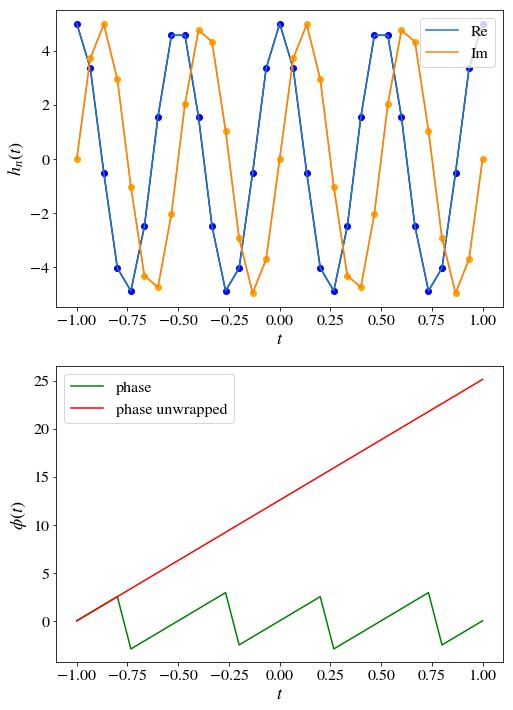

In [3]:
t_n = np.linspace(-1, 1, 31)    # create the time samples

dt = t_n[1] - t_n[0]            # time step

f0 = 2.0                       # frequency
A0 = 5.0                       # amplitude

h_n = A0*np.exp(1j*2*np.pi*f0*t_n)          # create the signal samples

phase = np.arctan2(np.imag(h_n),np.real(h_n)) # find the signal phase
phase_unwrapped = np.unwrap(phase)            # unwrap the signal phase

fig = plt.figure(1, figsize=(8,12), frameon=False)
fig = plt.figure(1, frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t_n, np.real(h_n),marker='o', color='blue')
ax1.plot(t_n, np.real(h_n), color='tab:blue', label="Re")
ax1.plot(t_n, np.imag(h_n), marker='o', color='orange')
ax1.plot(t_n, np.imag(h_n), color='tab:orange', label="Im")
ax1.set_xlabel('$t$')
ax1.set_ylabel('$h_n(t)$')
ax1.legend()
ax2 = fig.add_subplot(212)
ax2.plot(t_n, phase, color='green', label='phase')
ax2.plot(t_n, phase_unwrapped, color='red', label='phase unwrapped')
ax2.legend()
ax2.set_xlabel('$t$')
ax2.set_ylabel('$\phi(t)$')
plt.show()

The DFT of the complex time series is no longer symmetric around $f=0$.

In [4]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

phase = np.angle(H_k_shift)

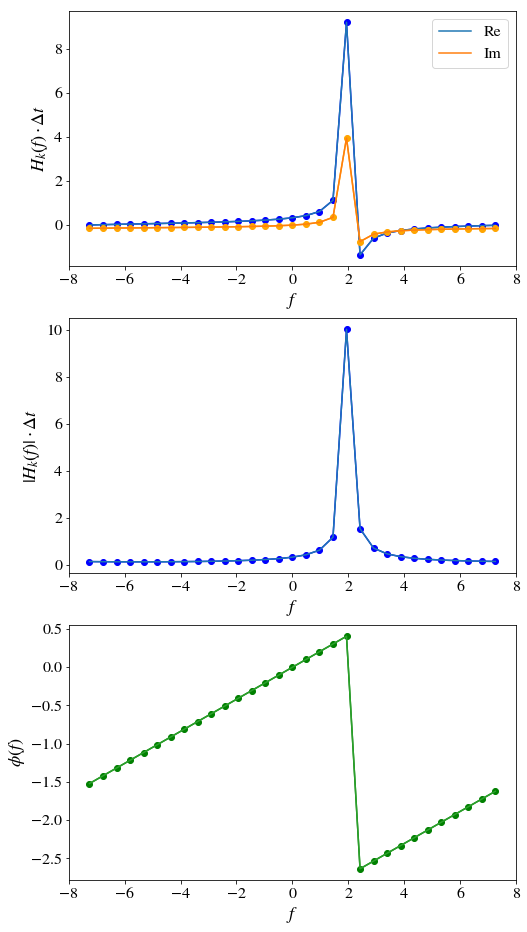

In [5]:
fig = plt.figure(1, figsize=(8,16), frameon=False)

ax1 = fig.add_subplot(311)
ax1.plot(f_shift, np.real(H_k_shift)*dt,marker='o', color='blue')
ax1.plot(f_shift, np.real(H_k_shift)*dt, color='tab:blue', label="Re")
ax1.plot(f_shift, np.imag(H_k_shift)*dt, marker='o', color='orange')
ax1.plot(f_shift, np.imag(H_k_shift)*dt, color='tab:orange', label="Im")
ax1.set_xlabel('$f$')
ax1.set_ylabel('$H_k(f)\cdot \Delta t$')
ax1.legend()

ax2 = fig.add_subplot(312)
ax2.plot(f_shift, np.abs(H_k_shift)*dt,marker='o', color='blue')
ax2.plot(f_shift, np.abs(H_k_shift)*dt, color='tab:blue')
ax2.set_xlabel('$f$')
ax2.set_ylabel('$|H_k(f)|\cdot \Delta t$')

ax3 = fig.add_subplot(313)
ax3.plot(f_shift, phase, marker='o', color='green')
ax3.plot(f_shift, phase, color='tab:green')
ax3.set_xlabel('$f$')
ax3.set_ylabel('$\phi(f)$')

plt.show()

### Example 2: Three damped sinusoids with small noise

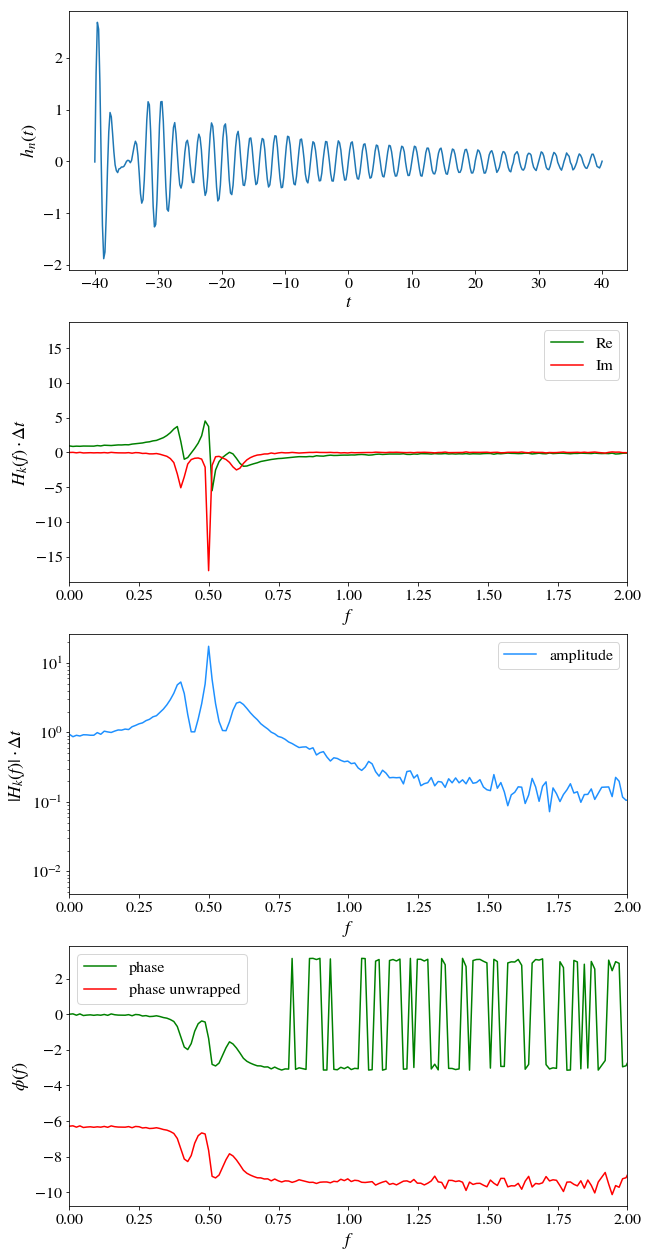

In [6]:
f0 = 0.5

A0 = 1.0
Anoise = 0.002

t_n = np.linspace(-40, 40, 401)       # linearly space time array 

h_n = np.sin(2.0*np.pi*f0*t_n)*np.exp(-(t_n+40)/40) \
    + 1.0*np.sin(2.0*np.pi*0.8*f0*t_n)*np.exp(-(t_n+40)/10) \
    + 1.0*np.sin(2.0*np.pi*1.2*f0*t_n)*np.exp(-(t_n+40)/5) 

for i in range(0,401):              # add noise
    h_n[i] += Anoise*random.randint(-10,10)
    
dt = t_n[1] - t_n[0] # increment between times in time array

H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

A = np.abs(H_k_shift)

phase = np.angle(H_k_shift)
phase_unwrap = np.unwrap(phase)

fig = plt.figure(1, figsize=(10,22), frameon=False)

ax1 = fig.add_subplot(411)
ax1.plot(t_n, h_n)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$h_n(t)$')

ax2 = fig.add_subplot(412)
ax2.plot(f_shift, np.real(H_k_shift)*dt, color='green', label='Re')
ax2.plot(f_shift, np.imag(H_k_shift)*dt, color='red', label='Im')
ax2.legend()
ax2.set_xlim(0,2)
ax2.set_xlabel(r'$f$')
ax2.set_ylabel(r'$H_k(f) \cdot \Delta t$')

ax3 = fig.add_subplot(413)
ax3.plot(f_shift, A*dt, color='dodgerblue', label='amplitude')
ax3.set_yscale("log", nonposy='clip')
ax3.set_xlim(0,2)
ax3.legend()
ax3.set_xlabel(r'$f$')
ax3.set_ylabel(r'$|H_k(f)|\cdot \Delta t$')

ax4 = fig.add_subplot(414)
ax4.plot(f_shift, phase, color='green', label='phase')
ax4.plot(f_shift, phase_unwrap, color='red', label='phase unwrapped')
ax4.legend()
ax4.set_xlim(0,2)
ax4.set_xlabel(r'$f$')
ax4.set_ylabel(r'$\phi(f)$')
plt.show()

### Example 3: Three damped sinusoids with large noise

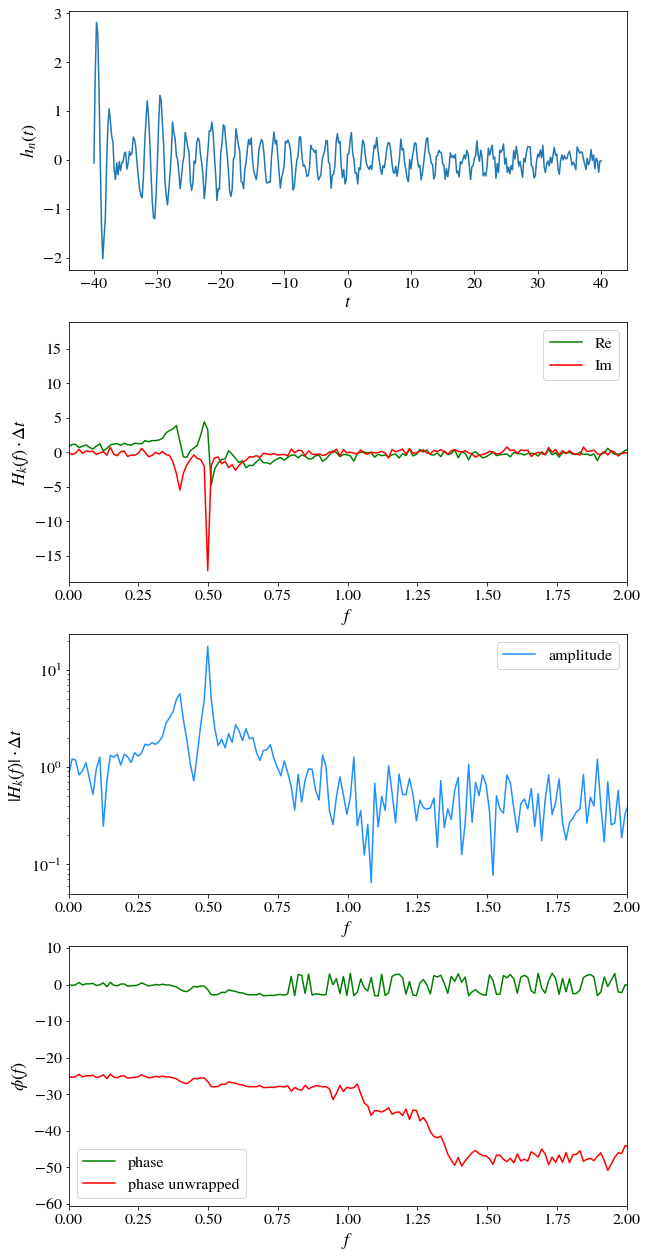

In [7]:
f0 = 0.5

A0 = 1.0
Anoise = 0.02

t_n = np.linspace(-40, 40, 401)       # linearly space time array 

h_n = np.sin(2.0*np.pi*f0*t_n)*np.exp(-(t_n+40)/40) \
    + 1.0*np.sin(2.0*np.pi*0.8*f0*t_n)*np.exp(-(t_n+40)/10) \
    + 1.0*np.sin(2.0*np.pi*1.2*f0*t_n)*np.exp(-(t_n+40)/5) 

for i in range(0,401):              # add noise
    h_n[i] += Anoise*random.randint(-10,10)
    
dt = t_n[1] - t_n[0] # increment between times in time array

H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

A = np.abs(H_k_shift)

phase = np.angle(H_k_shift)
phase_unwrap = np.unwrap(phase)

fig = plt.figure(1, figsize=(10,22), frameon=False)

ax1 = fig.add_subplot(411)
ax1.plot(t_n, h_n)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$h_n(t)$')

ax2 = fig.add_subplot(412)
ax2.plot(f_shift, np.real(H_k_shift)*dt, color='green', label='Re')
ax2.plot(f_shift, np.imag(H_k_shift)*dt, color='red', label='Im')
ax2.legend()
ax2.set_xlim(0,2)
ax2.set_xlabel(r'$f$')
ax2.set_ylabel(r'$H_k(f) \cdot \Delta t$')

ax3 = fig.add_subplot(413)
ax3.plot(f_shift, A*dt, color='dodgerblue', label='amplitude')
ax3.set_yscale("log", nonposy='clip')
ax3.set_xlim(0,2)
ax3.legend()
ax3.set_xlabel(r'$f$')
ax3.set_ylabel(r'$|H_k(f)|\cdot \Delta t$')

ax4 = fig.add_subplot(414)
ax4.plot(f_shift, phase, color='green', label='phase')
ax4.plot(f_shift, phase_unwrap, color='red', label='phase unwrapped')
ax4.legend()
ax4.set_xlim(0,2)
ax4.set_xlabel(r'$f$')
ax4.set_ylabel(r'$\phi(f)$')
plt.show()